## Introduction
<p>In this project I analyzed the dataset from Kaggle at the following linke:<br/>
<a>https://www.kaggle.com/faressayah/stanford-open-policing-project</a><br/>
The dataset includes information about traffic stops by police in Rhod Island (a U.S. state in New England).<br/>
Acknowledgements:<br/>
This dataset was kindly made available by the Stanford Open Policing Project and the following is their working paper:<br/>E. Pierson, C. Simoiu, J. Overgoor, S. Corbett-Davies, V. Ramachandran, C. Phillips, S. Goel. (2017) “A large-scale analysis of racial disparities in police stops across the United States”.<br/>
This project does not make any conclusion.</p>

### Importing and checking data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
ri=pd.read_csv('police_project.csv')
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [4]:
ri.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### Cleaning and organizing data

In [6]:
ri.drop(['county_name','driver_age_raw'],axis='columns',inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
print(ri.isnull().sum())
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64
(86406, 13)


In [7]:
# Changed the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
# Checked the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


In [8]:
#combining the columns 'stop_date' and 'stop_time' into the series combined
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)
# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object


In [9]:
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')
# Converted 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)
# checked the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object


In [10]:
ri.set_index('stop_datetime', inplace=True)
# Examine the index
print(ri.index)
# checked the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')


### Violations proportions

In [11]:
#  Counts of the unique values in 'violation'as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64


### Distribution of stops by driver gender

In [62]:
ri.driver_gender.value_counts(normalize=True)

M    0.727901
F    0.272099
Name: driver_gender, dtype: float64

### Comparing drug related stops by driver gender

In [64]:
ri[ri['drugs_related_stop']==True].driver_gender.value_counts(normalize=True)

M    0.882209
F    0.117791
Name: driver_gender, dtype: float64

### Comparing violation types by driver gender

In [65]:
ri.groupby('violation').driver_gender.value_counts(normalize=True)

violation            driver_gender
Equipment            M                0.774319
                     F                0.225681
Moving violation     M                0.802515
                     F                0.197485
Other                M                0.840167
                     F                0.159833
Registration/plates  M                0.704837
                     F                0.295163
Seat belt            M                0.784892
                     F                0.215108
Speeding             M                0.680527
                     F                0.319473
Name: driver_gender, dtype: float64

### Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. I analized the data to find out if it is true for this data.

In [12]:
# Created a DataFrame of female drivers
female_and_speeding = ri[(ri.driver_gender == 'F')&(ri.violation=='Speeding')]
 
# Created a DataFrame of male drivers 
male_and_speeding =ri[(ri.driver_gender=='M')&(ri.violation=='Speeding')]

# Computed the violations by female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True)) 
print('\n')
# Computed the violations by male drivers (as propo)rtons)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
N/D                 0.000840
Arrest Passenger    0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64


Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
N/D                 0.001061
No Action           0.001061
Name: stop_outcome, dtype: float64


### Calculating the search rate
<p>During a traffic stop, the police officer sometimes conducts a search of the vehicle. I calculated the percentage of all stops in the ri DataFrame that result in a vehicle search.</p>

In [13]:
# The data type of 'search_conducted'
print(ri['search_conducted'].dtype)
# Calculated the search rate by taking the mean
print(ri['search_conducted'].mean())

bool
0.036988172117677014


### Comparing search rates by gender
<p>I compared  the rates at which female and male drivers are searched during a traffic stop</p>

In [14]:
print(ri.groupby(['driver_gender'],as_index=False).search_conducted.mean())

  driver_gender  search_conducted
0             F          0.020033
1             M          0.043326


### Comparing search rates by gender and violation type
<p>Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.
For example,one hypothesize would be that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.
I tested this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis is true, I should find that males and females are searched at about the same rate for each violation</p>

In [15]:
print(ri.groupby(['violation','driver_gender'])['search_conducted'].mean())

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64


<p>For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.</p>

### Analizing protective frisks
<p>During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."
I first checked to see how many times "Protective Frisk" was the only search type. Then, I located all instances in which the driver was frisked.</p>

In [16]:
# Counted the 'search_type' values
print(ri.search_type.value_counts())

# Checked if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Checked the data type of 'frisk'
print(ri.frisk.dtype)

# Took the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

In [17]:
# Created a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculated the overall frisk rate
print(searched.frisk.mean())

# Calculated the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

0.08573216520650813
driver_gender
F    0.061571
M    0.089908
Name: frisk, dtype: float64


### The hourly arrest rate

In [18]:
# The overall arrest rate
print(ri.is_arrested.mean())

# Saved the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

0.03389810892762077


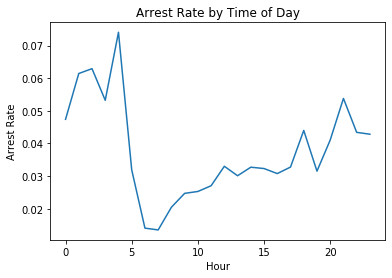

In [19]:
# Created a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

### Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search.I assessed whether these drug-related stops are becoming more common over time.

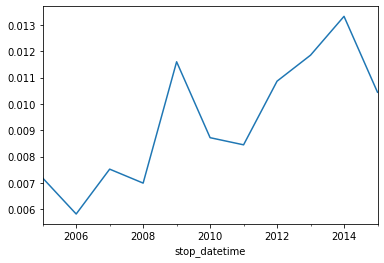

In [20]:
# Saved the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Created a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.show()

### Comparing drug and search rates
<p>According to the previous section The rate of drug-related stops increased significantly between 2005 and 2015. The hypothesize might come to mind that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
I tested this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then both rates should increasing over time.</p>

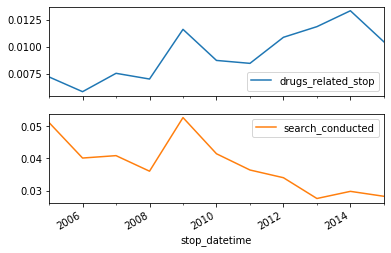

In [21]:
# Calculated and saved the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenated 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

annual.plot(subplots=True)
plt.show()

<p>The rate of drug-related stops increased even though the search rate decreased, disproving my hypothesis.</p>

### How often searches were performed for each type of violation

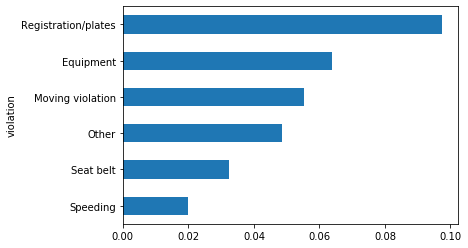

In [22]:
search_rate_per_vilation=ri.groupby('violation').search_conducted.mean().sort_values()
search_rate_per_vilation.plot(kind='barh')
plt.show()

### Converting stop durations to numbers
<p>In the traffic stops dataset, the stop_duration column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'.I converted the stop durations to integers. Because the precise durations are not available, I had to estimate the numbers using reasonable values:</p>
<ul>
<li>Converted '0-15 Min' to 8</li>
<li>Converted '16-30 Min' to 23</li>
<li>Converted '30+ Min' to 45</li>
</ul>

In [23]:
# The unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Created a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8,
 '16-30 Min' : 23,
 '30+ Min' : 45}

# Converted the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# The unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8. 23. 45. nan]


### Average stop length for each violation

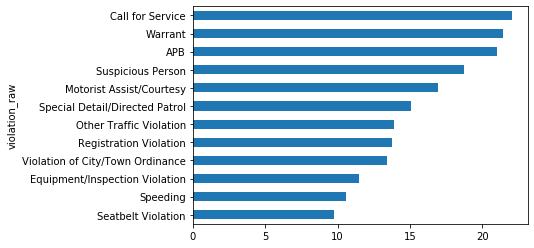

In [24]:
# Calculated and saved the mean 'stop_minutes' for each value in 'violation_raw' as a series
stop_length =ri.groupby('violation_raw').stop_minutes.mean()

# Sorted 'stop_length' by its values and create a horizontal bar plot
stop_length=stop_length.sort_values()

# Display the plot
stop_length.plot(kind='barh')
plt.show()

### The mean of age column

In [56]:
ri.driver_age.mean()

34.01186812676367

### The mean of age for drug related stops

In [59]:
ri[ri.drugs_related_stop==True].driver_age.mean()

28.153562653562652

### The mean of age for each violation type

In [53]:
ri.groupby('violation').driver_age.mean().sort_values()

violation
Equipment              31.781503
Seat belt              32.206301
Registration/plates    32.803035
Speeding               33.530449
Moving violation       36.120020
Other                  39.536870
Name: driver_age, dtype: float64

### Importing weather data

In [25]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv('weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [51]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2,bad
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3,bad


### Distribution of stops by race 

In [67]:
ri.driver_race.value_counts(normalize=True)

White       0.719348
Black       0.141703
Hispanic    0.110027
Asian       0.026144
Other       0.002778
Name: driver_race, dtype: float64

### Comparing search rates by driver's race

In [75]:
ri.groupby(['driver_race'],as_index=False).search_conducted.mean().sort_values('search_conducted',ascending=False)

,driver_race,search_conducted
1,Black,0.064521
2,Hispanic,0.061428
4,White,0.028445
0,Asian,0.022576
3,Other,0.012500


### Comparing search rates by driver's race and violation type

In [76]:
ri.groupby(['violation','driver_race'],as_index=False).search_conducted.mean()

,violation,driver_race,search_conducted
0,Equipment,Asian,0.069652
1,Equipment,Black,0.088556
2,Equipment,Hispanic,0.066170
3,Equipment,Other,0.000000
4,Equipment,White,0.054686
5,Moving violation,Asian,0.041916
6,Moving violation,Black,0.071453
7,Moving violation,Hispanic,0.066030
8,Moving violation,Other,0.019231
9,Moving violation,White,0.048829


### Examining the reasonableness of weather data 
<p>AWND is average wind speed in miles per hour, and WSF2 is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period.</p>

In [27]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


<p>The minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These signs show that the data is trustworthy</p>

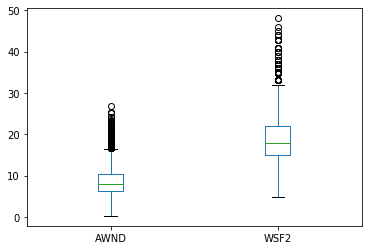

In [28]:
weather[['AWND','WSF2']].plot(kind='box')
plt.show()

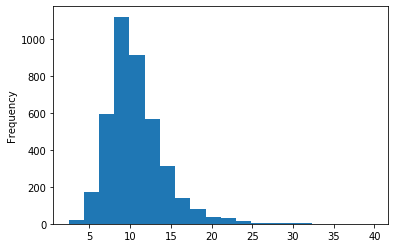

In [29]:
# subtracting the average speed from the fastest speed and storing the results
wind_diff=weather['WSF2']-weather['AWND']
# plotting the results
wind_diff.plot(kind='hist',bins=20)
plt.show()

<p> The difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.</p>

In [30]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<p>The temperature is measured in degrees Fahrenheit, not Celsius.</p>

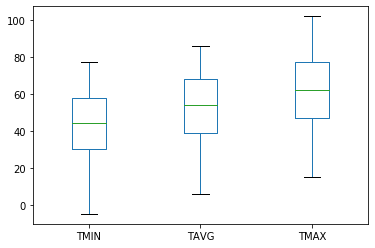

In [31]:
# Created and showed a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

<p>TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.</p>

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
dtype: float64


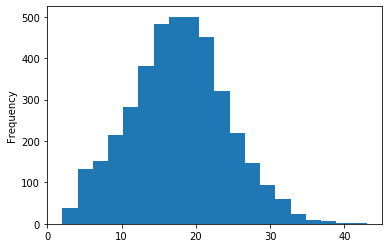

In [32]:
# Created a 'TDIFF' column that represents temperature difference
TDIFF=weather.TMAX-weather.TMIN

# Described the 'TDIFF' column
print(TDIFF.describe())

# Created a histogram with 20 bins to visualize 'TDIFF'
TDIFF.plot(kind='hist',bins=20)

plt.show()

<p>The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.</p>

### Categorizing weather

<p>The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:<br/>
WT05 indicates "Hail"<br/>
WT11 indicates "High or damaging winds"<br/>
WT17 indicates "Freezing rain"<br/>
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).
I quantified "how bad" the weather was each day by counting the number of 1 values in each row.</p>

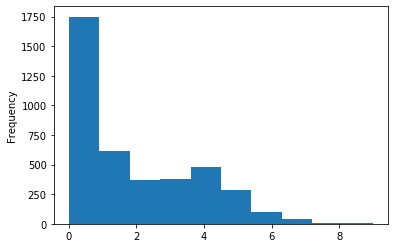

In [33]:
# Copied 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculated the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replaced missing values in 'bad_conditio ns' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Created a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')
plt.show()

<p>It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.</p>

<p>I used the counts to create a rating system for the weather. The counts range from 0 to 9. I converted the ranks to ratings as follows:
<ul>
<li>Convert 0 to 'good'</li>
<li>Convert 1 through 4 to 'bad'</li>
<li>Convert 5 through 9 to 'worse'</li>
</ul>
</p>

In [34]:
# Counted the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Created a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',
6:'worse',7:'worse',8:'worse',9:'worse'}

# Converted the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)
 
# Counted the unique values in 'rating' 
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


<p>Since the rating column only has a few possible values, I changed its data type to category in order to store the data more efficiently and also it would be more useful for further analysis.</p>

In [35]:
# Created a list of weather ratings in logical order
cats=['good', 'bad', 'worse']

# Changed the data type of 'rating' to category
weather['rating'] =pd.Categorical(weather.rating, ordered=True,categories=cats )

# Examined the head of 'rating' 
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


### Preparing the DataFrames for merging
<p>prepare the traffic stop and weather rating DataFrames so that they're ready to be merged</p>

In [36]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examined the head of 'ri'
display(ri.head(1))

# Created a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]

# Examined the head of 'weather_rating'
display(weather_rating.head(3))

,stop_datetime,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_minutes
0,2005-01-02 01:55:00,2005-01-02,01:55,M,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,8.0


,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad


### Merging the DataFrames

In [37]:
print(ri.shape)

# Merged 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86406, 16)
(86406, 18)


### Comparing arrest rates by weather rating

In [38]:
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.051874  0.058137  0.098385
Moving violation     0.056034  0.054080  0.066807
Other                0.080735  0.085547  0.051643
Registration/plates  0.085227  0.110013  0.096970
Seat belt            0.028602  0.019196  0.000000
Speeding             0.012606  0.013237  0.015361


In [39]:
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.032453
bad      0.034378
worse    0.039107
Name: is_arrested, dtype: float64


### Comparing violation type distribution by weather rating

In [45]:
ri_weather.groupby('rating').violation.value_counts(normalize=True)

rating  violation          
good    Speeding               0.553200
        Moving violation       0.184907
        Equipment              0.131557
        Seat belt              0.046152
        Other                  0.044732
        Registration/plates    0.039452
bad     Speeding               0.562411
        Moving violation       0.190710
        Equipment              0.130716
        Other                  0.048647
        Registration/plates    0.039238
        Seat belt              0.028278
worse   Speeding               0.593473
        Moving violation       0.187872
        Equipment              0.089972
        Other                  0.084423
        Registration/plates    0.043599
        Seat belt              0.000661
Name: violation, dtype: float64

<p>The seat belt violation type decreases as the weather condition gets worser.</p>